# Assignment 3 

* Haisen LIANG
* a1876489

## Read in data

* use the datasets from the same sector 
* diverse datasets 

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
import statsmodels.api as sm
import torch.nn as nn
import torch.optim as optim

In [3]:
# Fetch stock data
app_ticker = 'AAPL'  # apple 
apple_data = yf.Ticker(app_ticker)

# Get historical market data
Apple = apple_data.history(period="10y")  # Adjust the period as needed (1y is one year)

print(Apple)


                                 Open        High         Low       Close  \
Date                                                                        
2013-11-25 00:00:00-05:00   16.313353   16.465208   16.312728   16.398518   
2013-11-26 00:00:00-05:00   16.410417   16.786769   16.406661   16.700977   
2013-11-27 00:00:00-05:00   16.792085   17.095483   16.700971   17.094231   
2013-11-29 00:00:00-05:00   17.204446   17.481543   17.152158   17.410782   
2013-12-02 00:00:00-05:00   17.471214   17.669408   17.246406   17.259243   
...                               ...         ...         ...         ...   
2023-11-16 00:00:00-05:00  189.570007  190.960007  188.649994  189.710007   
2023-11-17 00:00:00-05:00  190.250000  190.380005  188.570007  189.690002   
2023-11-20 00:00:00-05:00  189.889999  191.910004  189.880005  191.449997   
2023-11-21 00:00:00-05:00  191.410004  191.520004  189.740005  190.639999   
2023-11-22 00:00:00-05:00  191.490005  192.929993  190.830002  191.309998   

## Data Preprocessing

In [4]:
# Convert the 'Date' index to a datetime object
Apple.index = pd.to_datetime(Apple.index)

# select the features
Apple = Apple.loc[:,["Open", "High", "Low","Close"]]
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-11-25 00:00:00-05:00 to 2023-11-22 00:00:00-05:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
dtypes: float64(4)
memory usage: 98.3 KB


In [5]:
# check the nans 
Apple.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

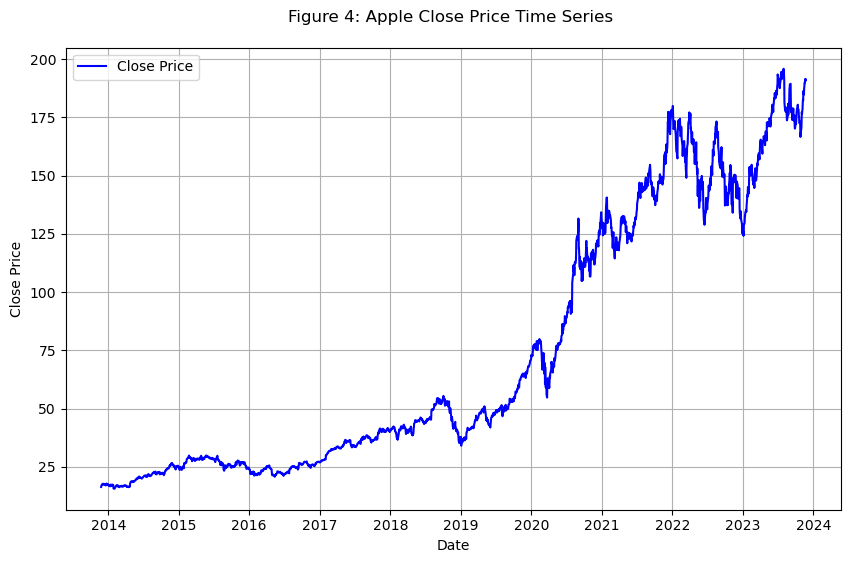

In [6]:

# Plotting the Close price as a time series
plt.figure(figsize=(10, 6))
plt.plot(Apple.index, Apple['Close'], label='Close Price', color='blue')
plt.title('Figure 4: Apple Close Price Time Series \n')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Apply logarithm transformation and take the difference remove trend and multiply by 100 for percentage changes
Apple["Price_Ratio"] = 100*np.log(Apple['Close']).diff()

Apple.dropna(inplace=True)
print(Apple)

                                 Open        High         Low       Close  \
Date                                                                        
2013-11-26 00:00:00-05:00   16.410417   16.786769   16.406661   16.700977   
2013-11-27 00:00:00-05:00   16.792085   17.095483   16.700971   17.094231   
2013-11-29 00:00:00-05:00   17.204446   17.481543   17.152158   17.410782   
2013-12-02 00:00:00-05:00   17.471214   17.669408   17.246406   17.259243   
2013-12-03 00:00:00-05:00   17.480601   17.733590   17.461189   17.731710   
...                               ...         ...         ...         ...   
2023-11-16 00:00:00-05:00  189.570007  190.960007  188.649994  189.710007   
2023-11-17 00:00:00-05:00  190.250000  190.380005  188.570007  189.690002   
2023-11-20 00:00:00-05:00  189.889999  191.910004  189.880005  191.449997   
2023-11-21 00:00:00-05:00  191.410004  191.520004  189.740005  190.639999   
2023-11-22 00:00:00-05:00  191.490005  192.929993  190.830002  191.309998   

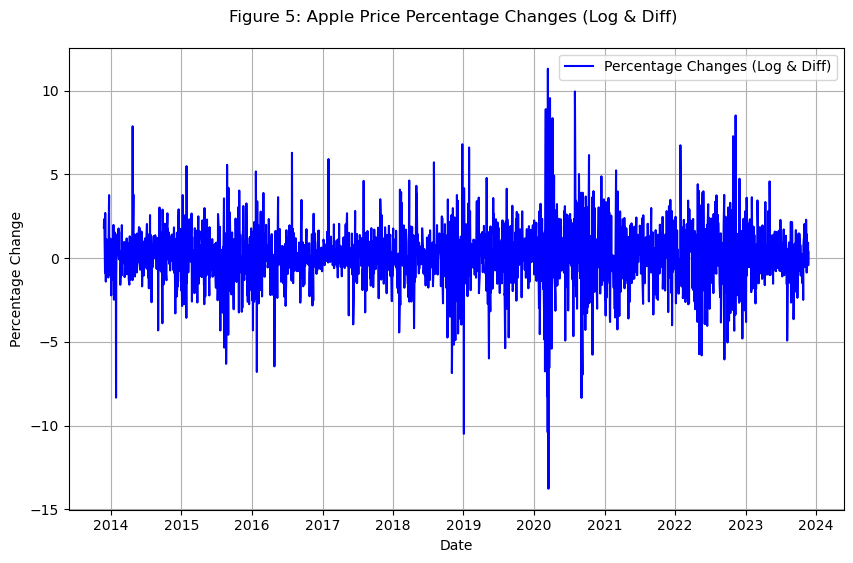

In [8]:
# Plotting the transformed data
plt.figure(figsize=(10, 6))
plt.plot(Apple.index, Apple['Price_Ratio'], label='Percentage Changes (Log & Diff)', color='blue')
plt.title('Figure 5: Apple Price Percentage Changes (Log & Diff) \n')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
Apple

,Open,High,Low,Close,Price_Ratio
Date,,,,,
2013-11-26 00:00:00-05:00,16.410417,16.786769,16.406661,16.700977,1.827630
2013-11-27 00:00:00-05:00,16.792085,17.095483,16.700971,17.094231,2.327378
2013-11-29 00:00:00-05:00,17.204446,17.481543,17.152158,17.410782,1.834864
2013-12-02 00:00:00-05:00,17.471214,17.669408,17.246406,17.259243,-0.874183
2013-12-03 00:00:00-05:00,17.480601,17.733590,17.461189,17.731710,2.700676
...,...,...,...,...,...
2023-11-16 00:00:00-05:00,189.570007,190.960007,188.649994,189.710007,0.900150
2023-11-17 00:00:00-05:00,190.250000,190.380005,188.570007,189.690002,-0.010545
2023-11-20 00:00:00-05:00,189.889999,191.910004,189.880005,191.449997,0.923549


In [11]:
# Extracting features and target variable
features = Apple[['Open', 'High', 'Low', 'Close']]
target = Apple['Price_Ratio'].values.astype(float)

# Normalize the features and target variable using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))  
for col in features.columns:
    scaler = MinMaxScaler(feature_range=(-1, 1))
    features[col] = scaler.fit_transform(features[col].values.reshape(-1, 1))
scaled_features = features.values.astype(float)
scaled_target = scaler.fit_transform(target.reshape(-1, 1)).flatten()



/var/folders/pt/sfbxgnd92k7dtp7451syg_kc0000gn/T/ipykernel_41355/2597230479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = scaler.fit_transform(features[col].values.reshape(-1, 1))
/var/folders/pt/sfbxgnd92k7dtp7451syg_kc0000gn/T/ipykernel_41355/2597230479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = scaler.fit_transform(features[col].values.reshape(-1, 1))
/var/folders/pt/sfbxgnd92k7dtp7451syg_kc0000gn/T/ipykernel_41355/2597230479.py:9: SettingWithCopyWarning: 
A

In [15]:

# Define sequence length for time series data
sequence_length = 10  # You can adjust this based on the sequence length for RNN

# Function to create sequences for RNN training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Create sequences for features and target variable
X = create_sequences(scaled_features, sequence_length)
y = scaled_target[sequence_length:]

# Convert the sequences to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

# Print the shapes of the tensors (just to verify)
print("Shape of X tensor:", X_tensor.shape)
print("Shape of y tensor:", y_tensor.shape)


Shape of X tensor: torch.Size([2505, 10, 4])
Shape of y tensor: torch.Size([2505])


In [16]:
# Split the data into training, validation, and testing sets

# Define the proportions for train, validation, test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Calculate the lengths for each set
num_samples = len(X)
train_len = int(train_ratio * num_samples)
val_len = int(val_ratio * num_samples)

# Split the data into train, validation, and test sets
X_train, y_train = X_tensor[:train_len], y_tensor[:train_len]
X_val, y_val = X_tensor[train_len:train_len + val_len], y_tensor[train_len:train_len + val_len]
X_test, y_test = X_tensor[train_len + val_len:], y_tensor[train_len + val_len:]

# Print the shapes of the sets (just to verify)
print("Train set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)

Train set shapes: torch.Size([1753, 10, 4]) torch.Size([1753])
Validation set shapes: torch.Size([375, 10, 4]) torch.Size([375])
Test set shapes: torch.Size([377, 10, 4]) torch.Size([377])


## Model Building 

In [21]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Define hyperparameters
input_size = X_train.shape[2]  # Number of features
output_size = 1  # Number of output features
hidden_size = 64  # Number of units in the hidden layer
num_layers = 2  # Number of LSTM layers

# Initialize the LSTM model
model = LSTMModel(input_size, hidden_size, output_size, num_layers)

In [22]:
# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
# Training loop
epochs = 100
train_loss_ls = []
valid_loss_ls = []


for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = loss_fn(outputs.squeeze(), y_train)
    train_loss.backward()
    optimizer.step()
    train_loss_ls.append(train_loss.item())

    # Validation loop using the trained model
    model.eval()
    with torch.no_grad():
        val_out = model(X_val)
        valid_loss = loss_fn(val_out.squeeze(), y_val)
        valid_loss_ls.append(valid_loss.item())

    print(f"Train Loss: {train_loss.item():.6f}, Validation Loss: {valid_loss.item():.6f}")
    
print("Done!")


Epoch 1
-------------------------------
Train Loss: 0.023104, Validation Loss: 0.021025
Epoch 2
-------------------------------
Train Loss: 0.021257, Validation Loss: 0.020440
Epoch 3
-------------------------------
Train Loss: 0.020654, Validation Loss: 0.020182
Epoch 4
-------------------------------
Train Loss: 0.020898, Validation Loss: 0.020133
Epoch 5
-------------------------------
Train Loss: 0.021271, Validation Loss: 0.020141
Epoch 6
-------------------------------
Train Loss: 0.021335, Validation Loss: 0.020148
Epoch 7
-------------------------------
Train Loss: 0.021154, Validation Loss: 0.020158
Epoch 8
-------------------------------
Train Loss: 0.020906, Validation Loss: 0.020184
Epoch 9
-------------------------------
Train Loss: 0.020717, Validation Loss: 0.020230
Epoch 10
-------------------------------
Train Loss: 0.020636, Validation Loss: 0.020287
Epoch 11
-------------------------------
Train Loss: 0.020654, Validation Loss: 0.020340
Epoch 12
---------------------

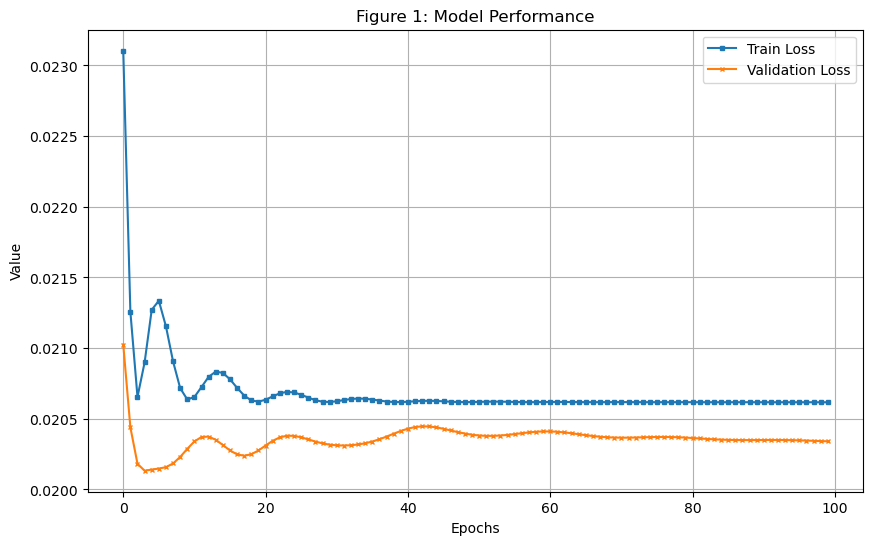

In [24]:
def Model_comparison(epochs, train_loss_ls, valid_loss_ls, title):
    epoch_range_train = range(len(train_loss_ls))
    epoch_range_val = range(len(valid_loss_ls))

    plt.figure(figsize=(10, 6))
    plt.plot(epoch_range_train, train_loss_ls, label='Train Loss', marker='s', markersize=3)
    plt.plot(epoch_range_val, valid_loss_ls, label='Validation Loss', marker='x', markersize=3)

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()

title = 'Model Performance'
Model_comparison(epochs, train_loss_ls, valid_loss_ls, title)

## Hyperparameters tuning 

* hyperparameters: mumber of model layers, hidden size, sequence step, and learning rate

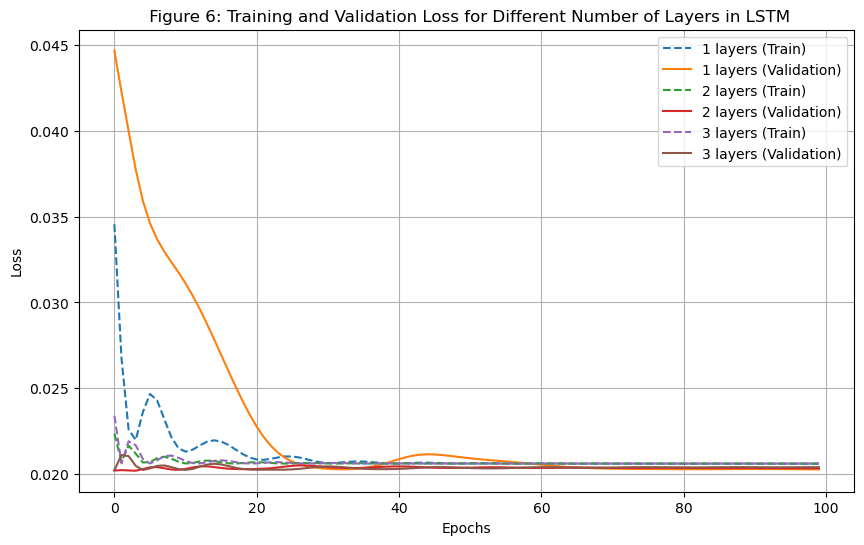

In [30]:
def train_with_layers(num_layers):
    # Initialize the LSTM model
    model = LSTMModel(input_size, hidden_size, output_size, num_layers)
    # Define loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epochs = 100
    train_loss_ls = []
    valid_loss_ls = []

    for t in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        train_loss = loss_fn(outputs.squeeze(), y_train)
        train_loss.backward()
        optimizer.step()
        train_loss_ls.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val)
            valid_loss = loss_fn(val_out.squeeze(), y_val)
            valid_loss_ls.append(valid_loss.item())

    return train_loss_ls, valid_loss_ls
num_layers_list = [1, 2, 3]

train_losses_per_layer = []
valid_losses_per_layer = []

# Train the model for each number of layers
for num_layers in num_layers_list:
    train_loss_ls, valid_loss_ls = train_with_layers(num_layers)
    train_losses_per_layer.append(train_loss_ls)
    valid_losses_per_layer.append(valid_loss_ls)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, num_layers in enumerate(num_layers_list):
    plt.plot(range(epochs), train_losses_per_layer[i], label=f'{num_layers} layers (Train)', linestyle='--')
    plt.plot(range(epochs), valid_losses_per_layer[i], label=f'{num_layers} layers (Validation)')

plt.title(' Figure 6: Training and Validation Loss for Different Number of Layers in LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


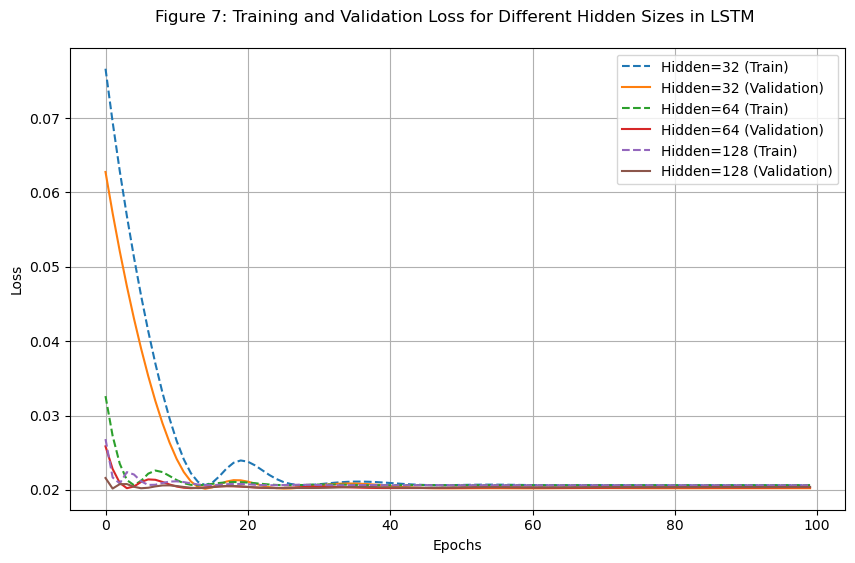

In [34]:
def train_with_hidden_size(hidden_size):
    # Initialize the LSTM model
    model = LSTMModel(input_size, hidden_size, output_size, num_layers)
    # Define loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epochs = 100
    train_loss_ls = []
    valid_loss_ls = []

    for t in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        train_loss = loss_fn(outputs.squeeze(), y_train)
        train_loss.backward()
        optimizer.step()
        train_loss_ls.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val)
            valid_loss = loss_fn(val_out.squeeze(), y_val)
            valid_loss_ls.append(valid_loss.item())

    return train_loss_ls, valid_loss_ls

# Define a list of hidden sizes to try
hidden_sizes = [32, 64, 128]

train_losses_per_hidden = []
valid_losses_per_hidden = []

# Train the model for each hidden size
for hidden_size in hidden_sizes:
    train_loss_ls, valid_loss_ls = train_with_hidden_size(hidden_size)
    train_losses_per_hidden.append(train_loss_ls)
    valid_losses_per_hidden.append(valid_loss_ls)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, hidden_size in enumerate(hidden_sizes):
    plt.plot(range(epochs), train_losses_per_hidden[i], label=f'Hidden={hidden_size} (Train)', linestyle='--')
    plt.plot(range(epochs), valid_losses_per_hidden[i], label=f'Hidden={hidden_size} (Validation)')

plt.title('Figure 7: Training and Validation Loss for Different Hidden Sizes in LSTM \n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


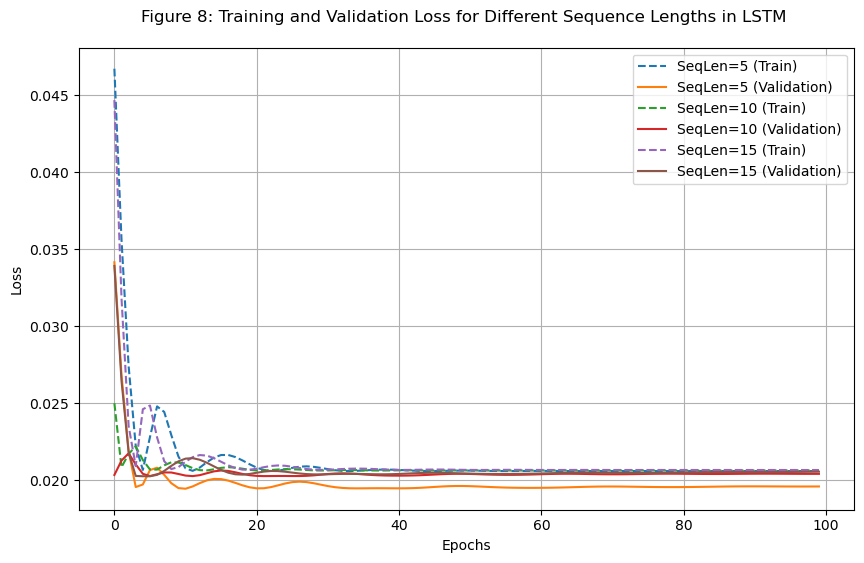

In [36]:
def train_with_sequence_length(seq_length):
    # Create sequences for features and target variable based on sequence length
    X_seq = create_sequences(scaled_features, seq_length)
    y_seq = scaled_target[seq_length:]

    # Convert the sequences to PyTorch tensors
    X_seq_tensor = torch.from_numpy(X_seq).float()
    y_seq_tensor = torch.from_numpy(y_seq).float()

    # Split the data into train, validation, and test sets based on new sequences
    X_train_seq, y_train_seq = X_seq_tensor[:train_len], y_seq_tensor[:train_len]
    X_val_seq, y_val_seq = X_seq_tensor[train_len:train_len + val_len], y_seq_tensor[train_len:train_len + val_len]

    # Initialize the LSTM model
    model = LSTMModel(input_size, hidden_size, output_size, num_layers)
    # Define loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epochs = 100
    train_loss_ls = []
    valid_loss_ls = []

    for t in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_seq)
        train_loss = loss_fn(outputs.squeeze(), y_train_seq)
        train_loss.backward()
        optimizer.step()
        train_loss_ls.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val_seq)
            valid_loss = loss_fn(val_out.squeeze(), y_val_seq)
            valid_loss_ls.append(valid_loss.item())

    return train_loss_ls, valid_loss_ls

# Define a list of sequence lengths to try
sequence_lengths = [5, 10, 15]

train_losses_per_seq_length = []
valid_losses_per_seq_length = []

# Train the model for each sequence length
for seq_length in sequence_lengths:
    train_loss_ls, valid_loss_ls = train_with_sequence_length(seq_length)
    train_losses_per_seq_length.append(train_loss_ls)
    valid_losses_per_seq_length.append(valid_loss_ls)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, seq_length in enumerate(sequence_lengths):
    plt.plot(range(epochs), train_losses_per_seq_length[i], label=f'SeqLen={seq_length} (Train)', linestyle='--')
    plt.plot(range(epochs), valid_losses_per_seq_length[i], label=f'SeqLen={seq_length} (Validation)')

plt.title('Figure 8: Training and Validation Loss for Different Sequence Lengths in LSTM \n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


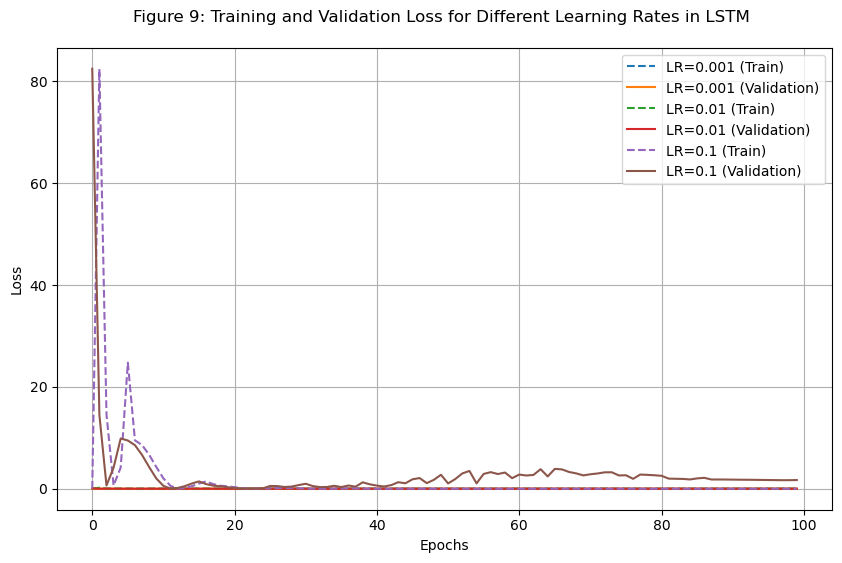

In [38]:
def train_with_lr(learning_rate):
    # Initialize the LSTM model
    model = LSTMModel(input_size, hidden_size, output_size, num_layers)
    # Define loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    epochs = 100
    train_loss_ls = []
    valid_loss_ls = []

    for t in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        train_loss = loss_fn(outputs.squeeze(), y_train)
        train_loss.backward()
        optimizer.step()
        train_loss_ls.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val)
            valid_loss = loss_fn(val_out.squeeze(), y_val)
            valid_loss_ls.append(valid_loss.item())

    return train_loss_ls, valid_loss_ls

# Define a list of learning rates to try
learning_rates = [0.001, 0.01, 0.1]

train_losses_per_lr = []
valid_losses_per_lr = []

# Train the model for each learning rate
for lr in learning_rates:
    train_loss_ls, valid_loss_ls = train_with_lr(lr)
    train_losses_per_lr.append(train_loss_ls)
    valid_losses_per_lr.append(valid_loss_ls)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(epochs), train_losses_per_lr[i], label=f'LR={lr} (Train)', linestyle='--')
    plt.plot(range(epochs), valid_losses_per_lr[i], label=f'LR={lr} (Validation)')

plt.title('Figure 9: Training and Validation Loss for Different Learning Rates in LSTM \n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## GRU model building and training

In [40]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out
# Initialize the GRU model
model = GRUModel(input_size, hidden_size, output_size, num_layers) 

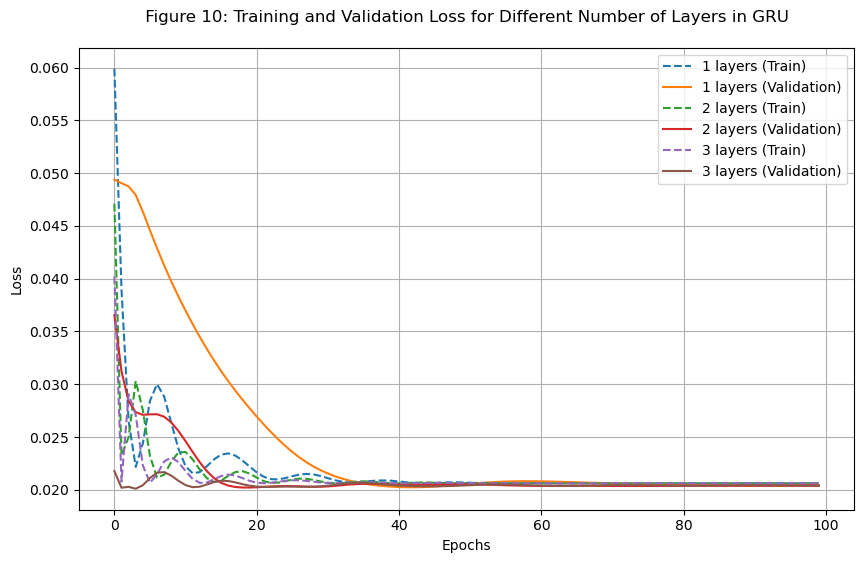

In [42]:
def train_with_layers(num_layers):
    # Initialize the LSTM model
    model = GRUModel(input_size, hidden_size, output_size, num_layers)
    # Define loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epochs = 100
    train_loss_ls = []
    valid_loss_ls = []

    for t in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        train_loss = loss_fn(outputs.squeeze(), y_train)
        train_loss.backward()
        optimizer.step()
        train_loss_ls.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val)
            valid_loss = loss_fn(val_out.squeeze(), y_val)
            valid_loss_ls.append(valid_loss.item())

    return train_loss_ls, valid_loss_ls
num_layers_list = [1, 2, 3]

train_losses_per_layer = []
valid_losses_per_layer = []

# Train the model for each number of layers
for num_layers in num_layers_list:
    train_loss_ls, valid_loss_ls = train_with_layers(num_layers)
    train_losses_per_layer.append(train_loss_ls)
    valid_losses_per_layer.append(valid_loss_ls)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, num_layers in enumerate(num_layers_list):
    plt.plot(range(epochs), train_losses_per_layer[i], label=f'{num_layers} layers (Train)', linestyle='--')
    plt.plot(range(epochs), valid_losses_per_layer[i], label=f'{num_layers} layers (Validation)')

plt.title(' Figure 10: Training and Validation Loss for Different Number of Layers in GRU \n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

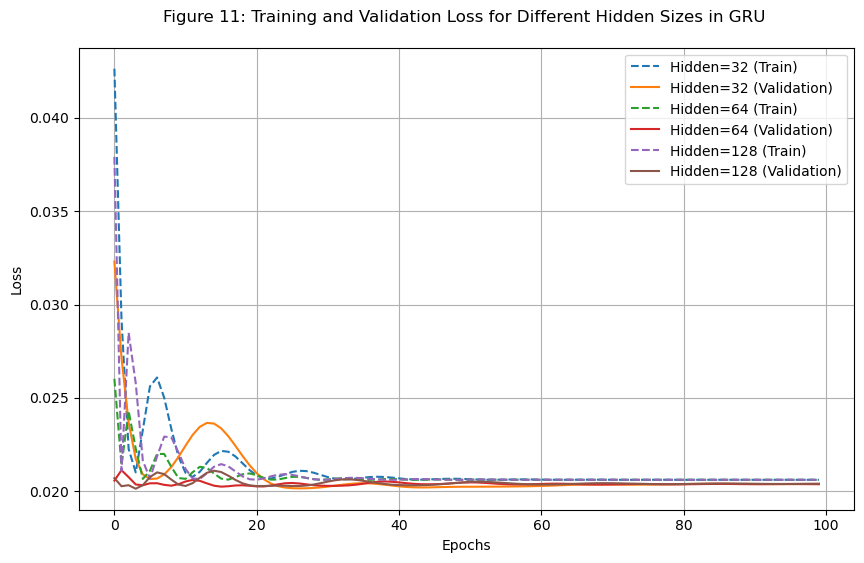

In [43]:
def train_with_hidden_size(hidden_size):
    # Initialize the LSTM model
    model = GRUModel(input_size, hidden_size, output_size, num_layers)
    # Define loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epochs = 100
    train_loss_ls = []
    valid_loss_ls = []

    for t in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        train_loss = loss_fn(outputs.squeeze(), y_train)
        train_loss.backward()
        optimizer.step()
        train_loss_ls.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val)
            valid_loss = loss_fn(val_out.squeeze(), y_val)
            valid_loss_ls.append(valid_loss.item())

    return train_loss_ls, valid_loss_ls

# Define a list of hidden sizes to try
hidden_sizes = [32, 64, 128]

train_losses_per_hidden = []
valid_losses_per_hidden = []

# Train the model for each hidden size
for hidden_size in hidden_sizes:
    train_loss_ls, valid_loss_ls = train_with_hidden_size(hidden_size)
    train_losses_per_hidden.append(train_loss_ls)
    valid_losses_per_hidden.append(valid_loss_ls)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, hidden_size in enumerate(hidden_sizes):
    plt.plot(range(epochs), train_losses_per_hidden[i], label=f'Hidden={hidden_size} (Train)', linestyle='--')
    plt.plot(range(epochs), valid_losses_per_hidden[i], label=f'Hidden={hidden_size} (Validation)')

plt.title('Figure 11: Training and Validation Loss for Different Hidden Sizes in GRU \n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


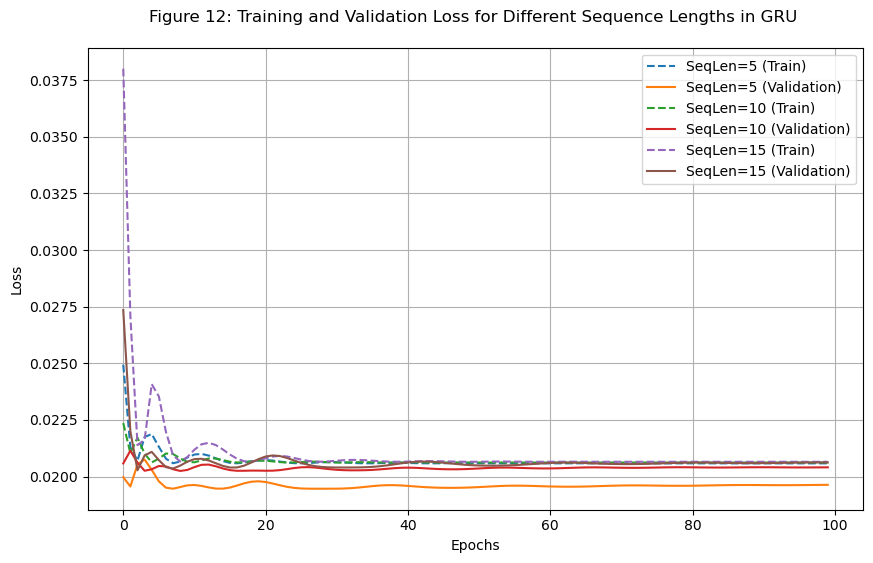

In [46]:
def train_with_sequence_length(seq_length):
    # Create sequences for features and target variable based on sequence length
    X_seq = create_sequences(scaled_features, seq_length)
    y_seq = scaled_target[seq_length:]

    # Convert the sequences to PyTorch tensors
    X_seq_tensor = torch.from_numpy(X_seq).float()
    y_seq_tensor = torch.from_numpy(y_seq).float()

    # Split the data into train, validation, and test sets based on new sequences
    X_train_seq, y_train_seq = X_seq_tensor[:train_len], y_seq_tensor[:train_len]
    X_val_seq, y_val_seq = X_seq_tensor[train_len:train_len + val_len], y_seq_tensor[train_len:train_len + val_len]

    # Initialize the LSTM model
    model = LSTMModel(input_size, hidden_size, output_size, num_layers)
    # Define loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epochs = 100
    train_loss_ls = []
    valid_loss_ls = []

    for t in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_seq)
        train_loss = loss_fn(outputs.squeeze(), y_train_seq)
        train_loss.backward()
        optimizer.step()
        train_loss_ls.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val_seq)
            valid_loss = loss_fn(val_out.squeeze(), y_val_seq)
            valid_loss_ls.append(valid_loss.item())

    return train_loss_ls, valid_loss_ls

# Define a list of sequence lengths to try
sequence_lengths = [5, 10, 15]

train_losses_per_seq_length = []
valid_losses_per_seq_length = []

# Train the model for each sequence length
for seq_length in sequence_lengths:
    train_loss_ls, valid_loss_ls = train_with_sequence_length(seq_length)
    train_losses_per_seq_length.append(train_loss_ls)
    valid_losses_per_seq_length.append(valid_loss_ls)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, seq_length in enumerate(sequence_lengths):
    plt.plot(range(epochs), train_losses_per_seq_length[i], label=f'SeqLen={seq_length} (Train)', linestyle='--')
    plt.plot(range(epochs), valid_losses_per_seq_length[i], label=f'SeqLen={seq_length} (Validation)')

plt.title('Figure 12: Training and Validation Loss for Different Sequence Lengths in GRU \n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


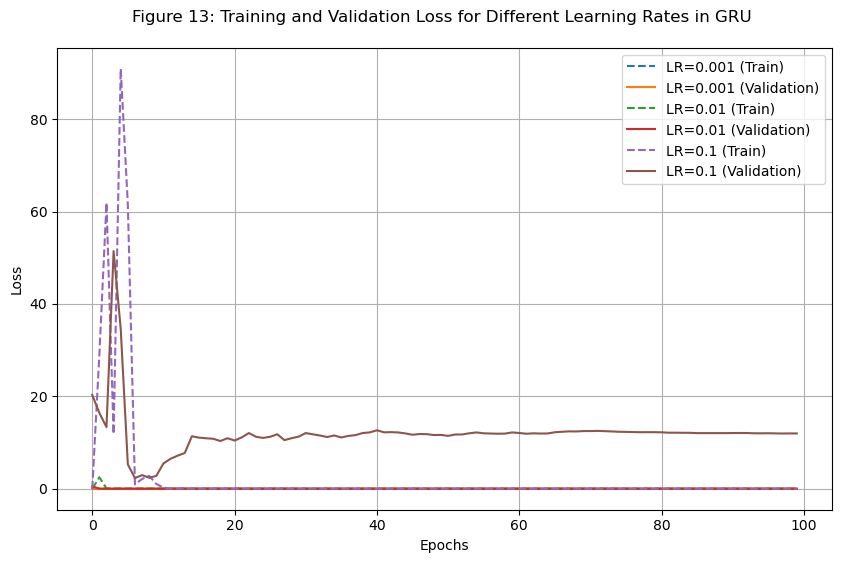

In [45]:
def train_with_lr(learning_rate):
    # Initialize the LSTM model
    model = GRUModel(input_size, hidden_size, output_size, num_layers)
    # Define loss function and optimizer
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    epochs = 100
    train_loss_ls = []
    valid_loss_ls = []

    for t in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        train_loss = loss_fn(outputs.squeeze(), y_train)
        train_loss.backward()
        optimizer.step()
        train_loss_ls.append(train_loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val)
            valid_loss = loss_fn(val_out.squeeze(), y_val)
            valid_loss_ls.append(valid_loss.item())

    return train_loss_ls, valid_loss_ls

# Define a list of learning rates to try
learning_rates = [0.001, 0.01, 0.1]

train_losses_per_lr = []
valid_losses_per_lr = []

# Train the model for each learning rate
for lr in learning_rates:
    train_loss_ls, valid_loss_ls = train_with_lr(lr)
    train_losses_per_lr.append(train_loss_ls)
    valid_losses_per_lr.append(valid_loss_ls)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(epochs), train_losses_per_lr[i], label=f'LR={lr} (Train)', linestyle='--')
    plt.plot(range(epochs), valid_losses_per_lr[i], label=f'LR={lr} (Validation)')

plt.title('Figure 13: Training and Validation Loss for Different Learning Rates in GRU \n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Comparsion of two models 

In [ ]:

lstm_model = LSTMModel(input_size, best_hid_size, output_size, best_num_layers)
gru_model = GRUModel(input_size, hidden_size, output_size, num_layers)

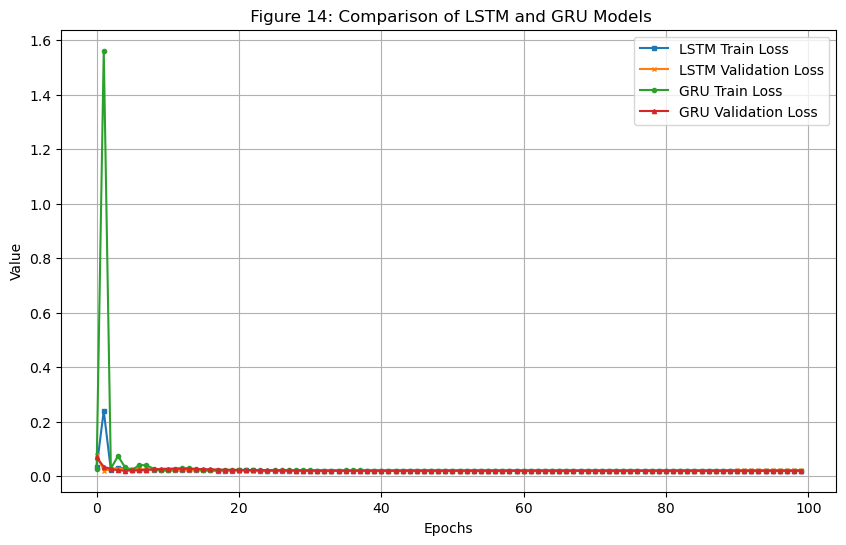

In [48]:
hid_size = 64
num_layers = 2
# Create LSTM model
lstm_model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# Create GRU model
gru_model = GRUModel(input_size, hidden_size, output_size, num_layers)

# Define loss function and optimizer
loss_fn = nn.MSELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.01)
gru_optimizer = optim.Adam(gru_model.parameters(), lr=0.01)

# Training loop for LSTM model
lstm_epochs = 100
lstm_train_loss_ls = []
lstm_valid_loss_ls = []

for t in range(lstm_epochs):
    lstm_model.train()
    lstm_optimizer.zero_grad()
    outputs = lstm_model(X_train)
    train_loss = loss_fn(outputs.squeeze(), y_train)
    train_loss.backward()
    lstm_optimizer.step()
    lstm_train_loss_ls.append(train_loss.item())

    # Validation loop using the trained model
    lstm_model.eval()
    with torch.no_grad():
        val_out = lstm_model(X_val)
        valid_loss = loss_fn(val_out.squeeze(), y_val)
        lstm_valid_loss_ls.append(valid_loss.item())

# Training loop for GRU model
gru_epochs = 100
gru_train_loss_ls = []
gru_valid_loss_ls = []

for t in range(gru_epochs):
    gru_model.train()
    gru_optimizer.zero_grad()
    outputs = gru_model(X_train)
    train_loss = loss_fn(outputs.squeeze(), y_train)
    train_loss.backward()
    gru_optimizer.step()
    gru_train_loss_ls.append(train_loss.item())

    # Validation loop using the trained model
    gru_model.eval()
    with torch.no_grad():
        val_out = gru_model(X_val)
        valid_loss = loss_fn(val_out.squeeze(), y_val)
        gru_valid_loss_ls.append(valid_loss.item())

# Plotting the model performance for both LSTM and GRU
def Model_comparison(epochs, lstm_train_loss_ls, lstm_valid_loss_ls, gru_train_loss_ls, gru_valid_loss_ls, title):
    epoch_range = range(epochs)

    plt.figure(figsize=(10, 6))
    plt.plot(epoch_range, lstm_train_loss_ls, label='LSTM Train Loss', marker='s', markersize=3)
    plt.plot(epoch_range, lstm_valid_loss_ls, label='LSTM Validation Loss', marker='x', markersize=3)
    plt.plot(epoch_range, gru_train_loss_ls, label='GRU Train Loss', marker='o', markersize=3)
    plt.plot(epoch_range, gru_valid_loss_ls, label='GRU Validation Loss', marker='^', markersize=3)

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()

title = ' Figure 14: Comparison of LSTM and GRU Models'
Model_comparison(lstm_epochs, lstm_train_loss_ls, lstm_valid_loss_ls, gru_train_loss_ls, gru_valid_loss_ls, title)